<a href="https://colab.research.google.com/github/widegather1216/2-2deep/blob/main/%EC%88%98_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EC%86%8C%ED%94%84%ED%8A%B8%EC%9B%A8%EC%96%B4%ED%95%99%EA%B3%BC_20231586_%EA%B9%80%EB%B2%94%EC%A4%80_4%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C(SVM_New_%ED%99%9C%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0, 0.5, 'sepal width (cm)')

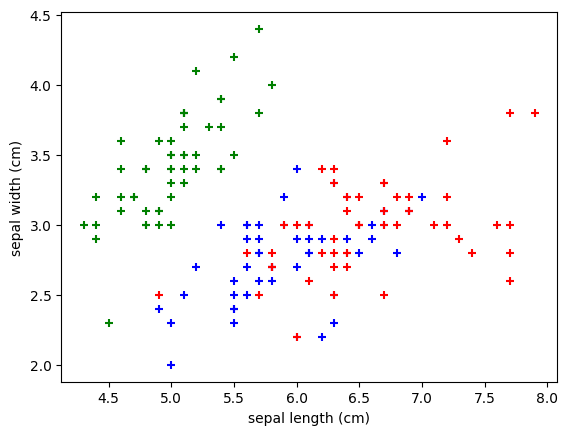

In [ ]:
# library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import os

# 환경변수를 사용하여 로깅을 제어 :
# 기본-0/ INFO 로그로 필터링:!/ WARING 로그로 필터 :2, Error 로그를 추가로 필터링 : 3 설정
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# sklearn 에서 제공하는 iris 데이터 호출
iris = datasets.load_iris()

iris.feature_names
[ 'sepal length (cm)',
    'sepal width (cm)',
    'petal length (cm)',
    'petal width (cm)']

df = pd.DataFrame(iris.data, columns=iris.feature_names)
# 데이터 프레임을 만들어줌

df['target'] = iris.target
# 'target' feature를 만들어줌

iris.target_names
# 'setosa'=0 'versicolor'=1, 'virginica'=2
np.array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# iris의 target_names를 apply하여 이름을 나타내어줌
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])

df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'green', marker = '+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'blue', marker = '+')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color = 'red', marker = '+')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')



In [ ]:
# sklearn에서 제공하는 model_selection 패키지의 train_test_split() 메서드를 활용
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42) # random_state로 동일하게 값을 분배하도록 함

model = svm.SVC(kernel='linear', C=3.0)  #kernel = 'linear' 선형 커널을 사용하여 데이터를 분류
                                          # C=10.0 오류에 대한 패널티를 조절하는 하이퍼 파리미터
parameters = {'kernel':['linear'], 'C':[1,2,3,4,5,6,7,8,9,10]}
grid_svm = GridSearchCV(model, param_grid=parameters, refit=True)
# param_grid : 하이퍼파라미터 튜닝을 위해 사용될 파라미터들을 dictionary 형태로 만들어 넣는다.
# cv : cross validation, 폴드라는 개념으로 교차검증을 위해 분할되는 수를 의미한다.
# refit : 데이터셋으로 찾은 최적화된 하이퍼파라미터를 사용해 최적 모델 재훈련할지 여부 결정

grid_svm.fit(X_train, y_train) # 훈련 데이터를 사용하여 svm 분류기를 훈련
predictions = grid_svm.predict(X_test) # 훈련된 모델을 사용하여 테스트 데이터를 예측
score = metrics.accuracy_score(y_test, predictions)
print("정확도: {0:0.3f}". format(score))
print(metrics.classification_report(y_test, predictions))
scores_df = pd.DataFrame(grid_svm.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

정확도: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'C': 1, 'kernel': 'linear'}",0.961905,3,1.000000,0.952381,0.904762
1,"{'C': 2, 'kernel': 'linear'}",0.971429,1,1.000000,0.952381,0.904762
2,"{'C': 3, 'kernel': 'linear'}",0.971429,1,1.000000,0.952381,0.904762
3,"{'C': 4, 'kernel': 'linear'}",0.961905,3,1.000000,0.904762,0.904762
4,"{'C': 5, 'kernel': 'linear'}",0.961905,3,1.000000,0.904762,0.904762
5,"{'C': 6, 'kernel': 'linear'}",0.952381,6,0.952381,0.904762,0.904762
6,"{'C': 7, 'kernel': 'linear'}",0.952381,6,0.952381,0.904762,0.904762
7,"{'C': 8, 'kernel': 'linear'}",0.952381,6,0.952381,0.904762,0.904762
8,"{'C': 9, 'kernel': 'linear'}",0.952381,6,0.952381,0.904762,0.904762
9,"{'C': 10, 'kernel': 'linear'}",0.952381,6,0.952381,0.904762,0.904762


In [ ]:
print('GridSearchCV 최적 파라미터:', grid_svm.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_svm.best_score_))

GridSearchCV 최적 파라미터: {'C': 2, 'kernel': 'linear'}
GridSearchCV 최고 정확도: 0.9619


In [ ]:

# Print the best hyperparameters and best score
print("Best Hyperparameters: ", grid_svm.best_params_)
print("Best Score: ", grid_svm.best_score_)

Best Hyperparameters:  {'C': 2, 'kernel': 'linear'}
Best Score:  0.9714285714285715
